# Examen Parcial PDI - U201622489 Daniel Núñez Robinson

In [223]:
import numpy as np
import skimage
from PIL import Image
from skimage.exposure import histogram, cumulative_distribution, equalize_hist 
from skimage.exposure import histogram
from skimage.filters import threshold_otsu, threshold_local, median
from skimage.io import imread 
import matplotlib.pyplot as plt
from skimage import measure
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import remove_small_holes
import sklearn.preprocessing 

# Carga de Datos (im1 a im9)

In [606]:
im1 = imread('S_.1.60.jpeg') 
im2 = imread('S_.1.70.jpeg') 
im3 = imread('S_.1.80.jpeg') 
im4 = imread('S_.1.90.jpeg') 
im5 = imread('S_.2.60.jpeg') 
im6 = imread('S_.2.70.jpeg') 
im7 = imread('S_.2.80.jpeg') 
im8 = imread('S_.2.90.jpeg') 
im9 = imread('S_3.00.jpeg')  

# Aquí seleccionar entre im1 a im9

In [651]:
x = im1.copy()

### Procesamiento de imágen inicia, se aislan ciertos colores de la imágen para encontrar las monedas de 10 céntimos

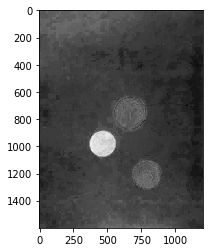

In [652]:
trabajar = x[:,:,0]
R = x[:,:,0]
G = x[:,:,1]
B = x[:,:,2]
trabajar = 0.9*G-0.70*B-0.25*R #Aislamos las monedas de 10 centimos
x = x[:,:,0]
plt.imshow(trabajar, cmap='gray')

# Auto Thresholding y Busqueda de Componentes

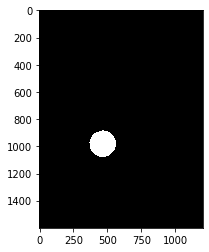

El threshold óptimo es 7.292187500000008


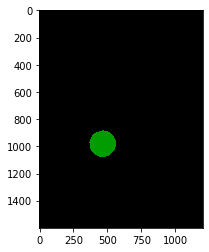

In [653]:
th = threshold_otsu(trabajar)
im_th = (trabajar > th)*1
im_th = binary_fill_holes(im_th)
plt.imshow(im_th,cmap='gray')
plt.show()
print("El threshold óptimo es {}".format(th))
im_labels = measure.label(im_th)
plt.imshow(im_labels,cmap='nipy_spectral')

In [654]:
n_componentes = im_labels.max()
n_componentes

11

# Si la imagen demuestra un Threshold poco efectivo, este se altera

In [655]:
if(n_componentes > 620):
    th = threshold_otsu(trabajar)
    im_th = (trabajar > th+15)*1
    im_th = binary_fill_holes(im_th)
    plt.imshow(im_th,cmap='gray')
    plt.show()
    im_labels = measure.label(im_th)
    plt.imshow(im_labels,cmap='nipy_spectral')
    n_componentes = im_labels.max()
    print(n_componentes)

# Resultado: Numero de Centavos

In [656]:
tamaños = []
for i in range(1, n_componentes+1):
    if (np.sum(im_labels==i) > 24000 and np.sum(im_labels==i)<160000):
        tamaños.append(np.sum(im_labels==i))
tamaños = np.array(tamaños)
tamaños.sort()

nCent = len(tamaños)
print("La cantidad de centavos en la imagen es de: ",nCent)

La cantidad de centavos en la imagen es de:  1


# Análisis de imágen original teniendo en cuenta que se descartan los centavos luego

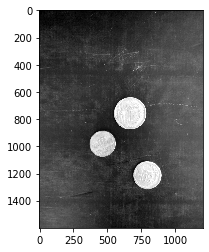

In [657]:
plt.imshow(x, cmap='gray')

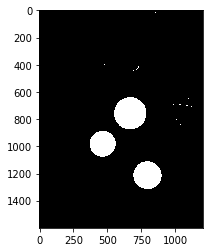

El threshold óptimo es 142


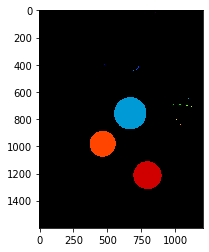

In [658]:
th = threshold_otsu(x)
im_th = (x > th)*1
im_th = binary_fill_holes(im_th)
plt.imshow(im_th,cmap='gray')
plt.show()
print("El threshold óptimo es {}".format(th))
im_labels = measure.label(im_th)
plt.imshow(im_labels,cmap='nipy_spectral')

In [659]:
n_componentes = im_labels.max()
n_componentes

75

# Solución Funcional para Imágenes 1-9

#### Creación de arreglo de tamaños

In [660]:
tamaños = []
for i in range(1, n_componentes+1):
    if (np.sum(im_labels==i) > 24000 and np.sum(im_labels==i)<160000):
        tamaños.append(np.sum(im_labels==i))
tamaños = np.array(tamaños)
tamaños.sort()
print(tamaños)

[28520 33247 43958]


#### Una lógica para establecer rangos a los cuales pertenecería una moneda

In [661]:
suma = 0.10*nCent
sumVals = [0.5,1]
svIndex = 0
for i in range(nCent, len(tamaños)):
    suma += sumVals[svIndex]
    if(i!= len(tamaños)-1):
        if -tamaños[i] + tamaños[i+1] > 6000 and svIndex != 1:
            svIndex += 1
print("El valor final de las monedas es de:",suma, "Soles")

El valor final de las monedas es de: 1.6 Soles
